Linear Regression with SciKit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sample Data

In [2]:
df = pd.read_csv("C:\\Users\\Ravi Nadageri\\Desktop\\Py_Practice _file\\ML_models\\basic_Linear_regression\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We have check, Is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend. Now we want to expand this to What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?

Multiple Features (N-Dimensional) lets review

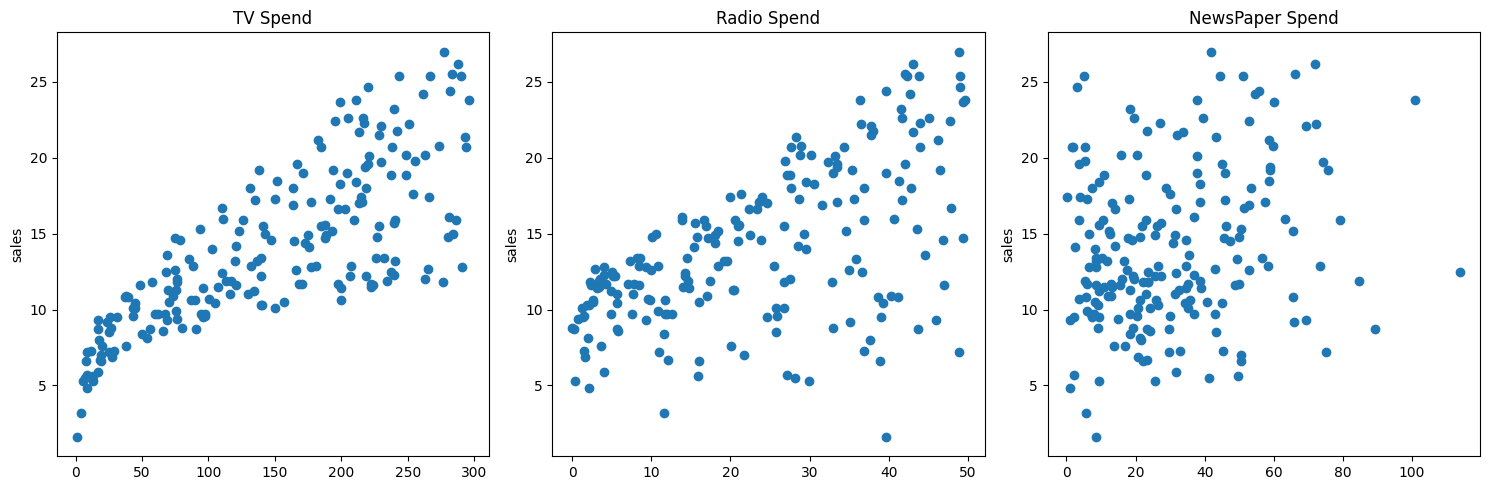

In [4]:
fig , axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('sales')
axes[2].set_title('NewsPaper Spend')
plt.tight_layout();


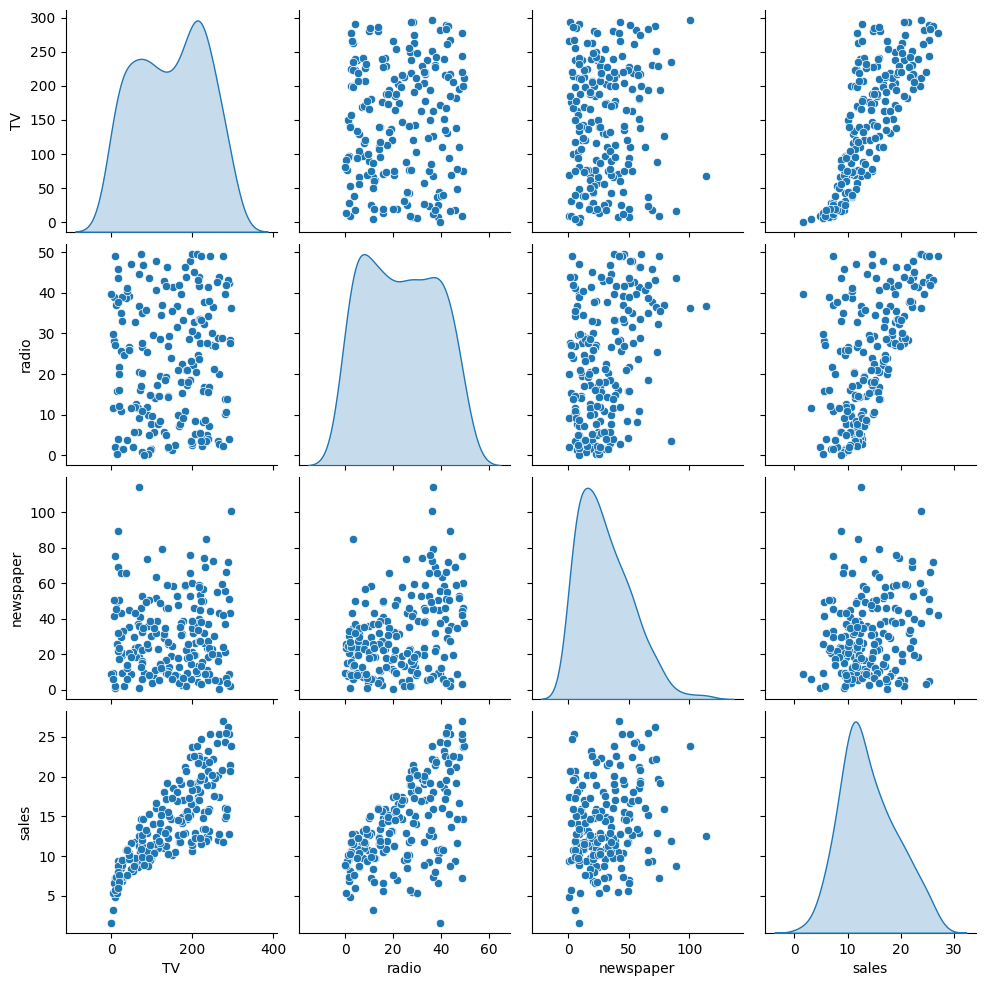

In [5]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

Lets start the ML process 

we have to use the scikit learn library

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

Train | Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# random_state:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [10]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [11]:
X_test.shape

(60, 3)

In [12]:
X_train.shape

(140, 3)

Creating a Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

Fit/Train the Model on the training data

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [17]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test,test_predictions)
print(' MAE - ',MAE)
MSE = mean_squared_error(y_test,test_predictions)
print('MSE - ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE ', RMSE)

 MAE -  1.213745773614481
MSE -  2.2987166978863782
RMSE  1.516151937599388


In [20]:
df['sales'].mean()

14.0225

Plotting Residuals

In [21]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

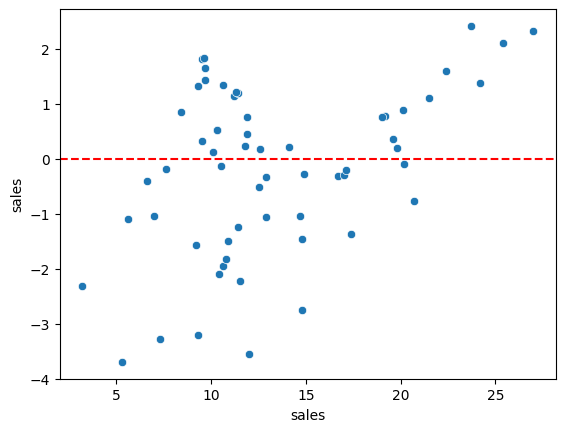

In [22]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [23]:
len(test_res)

60

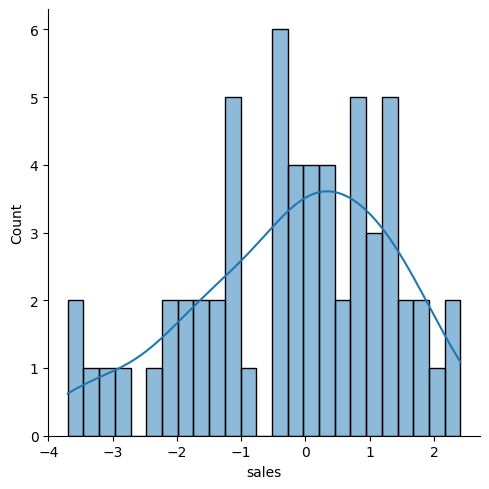

In [24]:
sns.displot(test_res,bins=25,kde=True)

# Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=2,include_bias=False)


In [39]:
poly.fit(X) #we will fit on original X data set

PolynomialFeatures(include_bias=False)

In [40]:
poly.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [41]:
poly.transform(X)[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [43]:
polyf = poly.transform(X)

In [44]:
polyf.shape

(200, 9)

In [47]:
polyf = poly.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

Remember here we have to pass the new created feature which is polyf instad of X

In [49]:
X_train, X_test, y_train, y_test = train_test_split(polyf, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
test_predictions=model.predict(X_test)

In [54]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mae = mean_squared_error(y_test,test_predictions)

In [58]:
mse = mean_squared_error(y_test,test_predictions)

In [59]:
mae

0.44175055104033895

In [60]:
mse

0.44175055104033895

In [61]:
rmse = np.sqrt(mse)
rmse

0.6646431757269

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

so we are getting better result than standerd Linear Regression model 

Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [64]:
train_rmse_error = []
test_rmse_error = []


for d in range(1,10):
    poly = PolynomialFeatures(degree=d,include_bias=False)
    polyf = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(polyf, y, test_size=0.3, random_state=101)


    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)



In [65]:
train_rmse_error

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.19399757603273932,
 5.421982503302247,
 0.1519554915781105,
 0.17181489440322673]

In [66]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.319765294961401,
 1378.531526416359,
 3090.516288100603,
 96216.91641765335]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


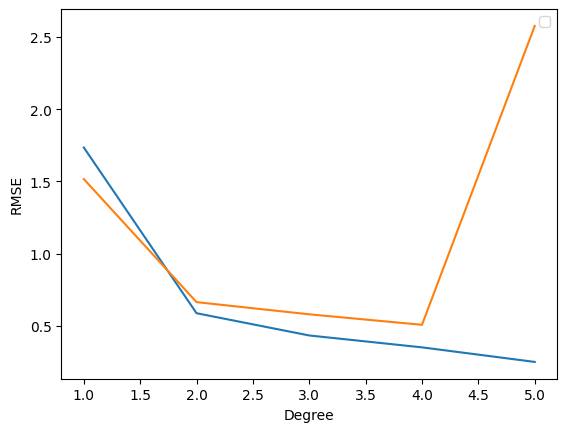

In [73]:
plt.plot(range(1,6),train_rmse_error[:5])
plt.plot(range(1,6),test_rmse_error[:5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
plt.plot(range(1,10),train_rmse_error)
plt.plot(range(1,10),test_rmse_error)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [74]:
final_poly = PolynomialFeatures(degree=3,include_bias=False)

In [76]:
final_model = LinearRegression()

In [77]:
full_converted_X = final_poly.fit_transform(X)

full_converted_X

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [78]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [80]:
from joblib import load, dump

In [85]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [89]:
dump(final_poly,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [90]:
final_loaded=load('final_poly_converter.joblib')

In [91]:
loaded_model = load('final_poly_model.joblib')

lets test the model 

In [92]:
campaign = [[149,22,12]]

In [94]:
transformed_data = final_loaded.fit_transform(campaign)

transformed_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [96]:
loaded_model.predict(transformed_data)

array([14.64501014])

So this way we can setup the model